# Student performance data set to predict requirement for faculty intervention so that majority passes the course

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary 
education or 4 â€“ higher education)

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)


27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

### These grades are related with the course subject, Math or Portuguese:

31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)


##### Dataset Link - https://archive.ics.uci.edu/ml/datasets/student+performance

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import time

import warnings
warnings.filterwarnings('ignore')

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
student_data = pd.read_csv('student-mat.csv', sep=';')

In [3]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [4]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
n_features = student_data.shape[1] - 1
print(n_features)

32


In [6]:
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
# since I want to set target column such that if a student scores more than 50% of markes, he will be passes the assesment
# else will be regarded as failure.

def set_target(score):
    if score > 10:
        return 1
    else:
        return 0


student_data['First Semester Score'] = student_data['G1']
student_data['Passed'] = student_data[student_data.columns[-1]].map(set_target)


In [9]:
student_data = student_data.drop(labels = ['G1','G2', 'G3'], axis = 1)

In [10]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,First Semester Score,Passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,0


In [11]:
target = student_data.columns[-1]
features = student_data.columns[:-1]

print('Target Variable - ', target)
print('Features - ', features)

X = student_data[features]
y = student_data[target]

Target Variable -  Passed
Features -  Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'First Semester Score'],
      dtype='object')


In [12]:
def preprocess_features(X):
    output = pd.DataFrame(index = X.index)
    
    for col, data in X.iteritems():
        if data.dtype == object:
            data = data.replace(['yes', 'no'], [1, 0])
        if data.dtype == object:
            data = pd.get_dummies(data, prefix = col)
            
        output = output.join(data)
        
    return output
    

X = preprocess_features(X)

In [13]:
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'First Semester Score', 'Passed'],
      dtype='object')

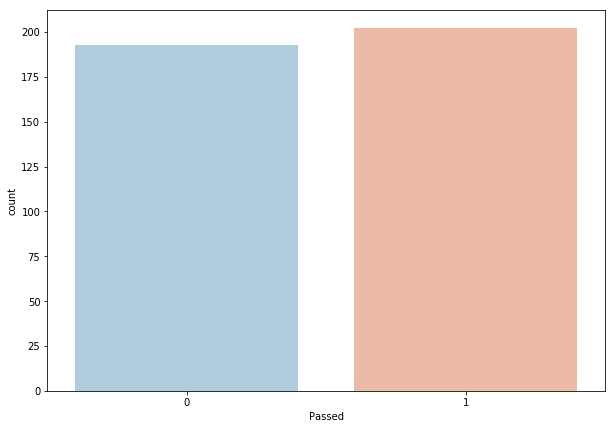

In [14]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Passed',data=student_data,palette='RdBu_r')

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.35, random_state = 0)

In [41]:
X.head()

,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,First Semester Score
0,1,0,1,0,18,0,1,1,0,1,...,0,0,4,3,4,1,1,3,6,5
1,1,0,1,0,17,0,1,1,0,0,...,1,0,5,3,3,1,1,3,4,5
2,1,0,1,0,15,0,1,0,1,0,...,1,0,4,3,2,2,3,3,10,7
3,1,0,1,0,15,0,1,1,0,0,...,1,1,3,2,2,1,1,5,2,15
4,1,0,1,0,16,0,1,1,0,0,...,0,0,4,3,2,1,2,5,4,6


In [42]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [47]:
def train_classifier(clf, X, y):
    '''Fits Classifier to given training data and outputs time taken for the training.'''
    
    start = time()
    clf.fit(X, y)
    end = time()
    
    print('Trained Model in {:.4f} seconds'.format(end - start))

    
def predict_labels(clf, X, y):
    y_pred = clf.predict(X)
    return f1_score(y, y_pred, pos_label=1)


def train_predict(clf, X_train, X_test, y_train, y_test):
    train_classifier(clf, X_train, y_train)
    print("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))
    print("Accuracy Score - ",accuracy_score(y_test, clf.predict(X_test)))
    print('\n')

In [49]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
print('Logistic Regression')
train_predict(clf, X_train, X_test, y_train, y_test)

from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
print('SVM - Linear')
train_predict(clf, X_train, X_test, y_train, y_test)

clf = SVC(kernel = 'rbf')
print('SVM - RBF')
train_predict(clf, X_train, X_test, y_train, y_test)

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
print('Naive Bayes - GaussianNB')
train_predict(clf, X_train, X_test, y_train, y_test)

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
clf = RandomForestClassifier(max_depth=5, n_estimators=5)
print('Random Forest')
train_predict(clf, X_train, X_test, y_train, y_test)

clf = AdaBoostClassifier()
print('Ada Boost')
train_predict(clf, X_train, X_test, y_train, y_test)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
print('2 nearest neighbours')
train_predict(clf, X_train, X_test, y_train, y_test)


Logistic Regression
Trained Model in 0.0030 seconds
F1 score for training set: 0.9885.
F1 score for test set: 0.9429.
Accuracy Score -  0.9424460431654677


SVM - Linear
Trained Model in 0.0050 seconds
F1 score for training set: 0.9923.
F1 score for test set: 0.9714.
Accuracy Score -  0.9712230215827338


SVM - RBF
Trained Model in 0.0059 seconds
F1 score for training set: 0.9923.
F1 score for test set: 0.9286.
Accuracy Score -  0.9280575539568345


Naive Bayes - GaussianNB
Trained Model in 0.0010 seconds
F1 score for training set: 0.8520.
F1 score for test set: 0.8533.
Accuracy Score -  0.841726618705036


Random Forest
Trained Model in 0.0030 seconds
F1 score for training set: 1.0000.
F1 score for test set: 0.9714.
Accuracy Score -  0.9712230215827338


Ada Boost
Trained Model in 0.0011 seconds
F1 score for training set: 1.0000.
F1 score for test set: 1.0000.
Accuracy Score -  1.0


2 nearest neighbours
Trained Model in 0.0010 seconds
F1 score for training set: 0.8218.
F1 score for t

Logistic Regression, Support Vector Machines with liear Kernels and Ada Boost algorithms are giving better results than others.

Ada Boost is giving near perfect score.

However, SVM and Adaboost have more complexity than Logistic Regresion. Hence, we will choose Logistic Regresison and implement hyperparameter optimisation on it.